In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype(int)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [12]:
df.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance              int64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary      int64
Exited               int64
Geography_Germany    int64
Geography_Spain      int64
Gender_Male          int64
dtype: object

In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146,2,0,1,124749,1,0,1
5140,626,29,4,105767,2,0,0,41104,0,0,0
2568,612,47,6,130024,1,1,1,45750,1,0,0
3671,646,52,6,111739,2,0,1,68367,1,0,0
7427,714,33,8,122017,1,0,0,162515,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363,1,1,1,66799,1,0,1
7813,684,63,3,81245,1,1,0,69643,1,0,0
905,672,45,9,0,1,1,1,92027,0,0,0
5192,663,39,8,0,2,1,1,101168,0,0,0


In [16]:
y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
import tensorboard
import keras
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\md199\Deep-Learning-CampusX\campus\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This code defines a simple neural network with three layers:

* **Input Layer:**
  * Takes 11 input features.
* **First Hidden Layer:**
  * Contains 11 neurons.
  * Uses the ReLU activation function.
* **Second Hidden Layer:**
  * Contains 11 neurons.
  * Uses the ReLU activation function.
* **Output Layer:**
  * Contains 1 neuron.
  * Uses the sigmoid activation function.

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6434 - loss: 0.6365 - val_accuracy: 0.7969 - val_loss: 0.4799
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7985 - loss: 0.4687 - val_accuracy: 0.8025 - val_loss: 0.4526
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8118 - loss: 0.4366 - val_accuracy: 0.8106 - val_loss: 0.4374
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8228 - loss: 0.4155 - val_accuracy: 0.8100 - val_loss: 0.4249
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8237 - loss: 0.4195 - val_accuracy: 0.8150 - val_loss: 0.4158
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8259 - loss: 0.4113 - val_accuracy: 0.8175 - val_loss: 0.4066
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8270 - loss: 0.4081 - val_accuracy: 0.8231 - val_loss: 0.3998
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8285 - loss: 0.3992 - val_accu

In [23]:
model.layers[0].get_weights()

[array([[-7.4885182e-02, -1.8297223e-02, -7.1824387e-02,  6.8556666e-02,
          4.6195346e-03, -3.0892155e-01,  4.9326894e-01, -1.8705949e-01,
          7.1020806e-01,  3.1632757e-01,  2.7468282e-01],
        [-1.6872810e-01, -1.9742087e-01,  1.5259422e+00, -5.3814530e-01,
         -1.4701127e-01,  9.3722858e-02, -4.1113394e-01, -2.5608060e-01,
          1.5844233e-01,  5.3366596e-01,  2.0887975e-01],
        [ 4.4450536e-02, -1.2271737e-01,  5.6949835e-02, -5.0129090e-02,
         -1.7080715e-01, -5.0545186e-01,  3.1720519e-01, -1.6940676e-01,
         -2.0667093e-01, -2.6125720e-01,  4.2919043e-02],
        [-7.9984653e-01, -6.5196836e-01, -1.4871037e-01, -5.0235432e-01,
          8.6182618e-01,  2.0805585e-01, -2.7986115e-01, -2.1893528e-01,
         -6.7005116e-01, -3.0170473e-01, -1.5390265e-01],
        [-3.4367335e-01, -8.6100161e-01, -4.8535216e-01,  4.0973496e-02,
         -4.8852578e-01, -1.5370511e-01, -5.7951474e-01, -4.8177551e-02,
         -2.3857486e-01,  1.3215967e+0

In [24]:
model.layers[1].get_weights()

[array([[ 1.42500326e-01,  1.00202538e-01, -3.60169679e-01,
          9.70056728e-02,  7.17426538e-01,  8.57506216e-01,
          2.40727469e-01,  2.08928332e-01,  6.09443545e-01,
          7.06980824e-02,  5.11642992e-01],
        [-9.35782492e-02, -1.19443727e+00,  1.08088389e-01,
          1.34235218e-01,  3.03278953e-01, -3.72033805e-01,
         -7.41207480e-01,  1.72376260e-01, -6.29432350e-02,
          4.45729256e-01, -6.31697655e-01],
        [ 1.09263802e+00,  4.82841074e-01, -1.19895407e-03,
          1.11240327e-01,  2.77649850e-01, -7.60025024e-01,
          3.95757020e-01,  5.73926806e-01, -8.75401318e-01,
         -9.60779637e-02, -6.01263046e-01],
        [-1.30439922e-01,  3.89137268e-01,  3.57572474e-02,
         -2.28639841e-01,  2.66003191e-01,  4.50987220e-01,
         -2.52462745e-01, -1.58535138e-01, -9.45900902e-02,
         -8.51825923e-02, -1.51817515e-01],
        [-3.77712250e-01,  2.17756554e-01,  1.36026442e-01,
         -9.79059994e-01, -3.05984747e-02,  

In [25]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [26]:
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8635

In [28]:
import matplotlib.pyplot as plt

In [29]:
history.history

{'accuracy': [0.7364062666893005,
  0.8012499809265137,
  0.8073437213897705,
  0.8187500238418579,
  0.8237500190734863,
  0.8265625238418579,
  0.8298437595367432,
  0.8295312523841858,
  0.8317187428474426,
  0.8326562643051147,
  0.8315625190734863,
  0.8309375047683716,
  0.8360937237739563,
  0.83984375,
  0.8450000286102295,
  0.8465625047683716,
  0.8520312309265137,
  0.8532812595367432,
  0.8548437356948853,
  0.8559374809265137,
  0.859375,
  0.8595312237739563,
  0.8584374785423279,
  0.8589062690734863,
  0.8595312237739563,
  0.860156238079071,
  0.8607812523841858,
  0.8615624904632568,
  0.8609374761581421,
  0.8620312213897705,
  0.8615624904632568,
  0.8631250262260437,
  0.8618749976158142,
  0.8614062666893005,
  0.8628125190734863,
  0.8618749976158142,
  0.8634374737739563,
  0.8635937571525574,
  0.8651562333106995,
  0.8653125166893005,
  0.8635937571525574,
  0.8654687404632568,
  0.8667187690734863,
  0.8651562333106995,
  0.8639062643051147,
  0.8648437261581

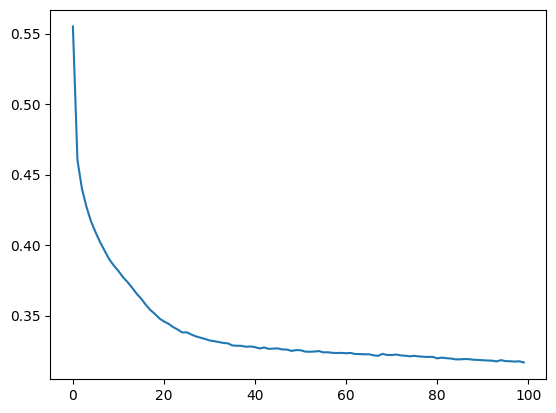

In [30]:
plt.plot(history.history['loss'])

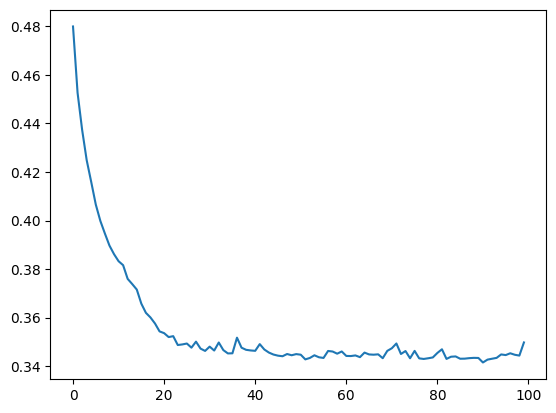

In [31]:
plt.plot(history.history['val_loss'])

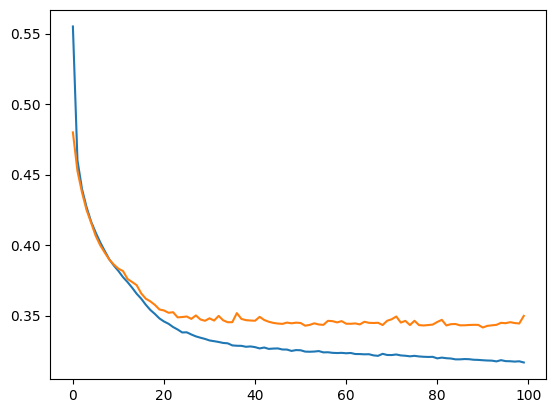

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

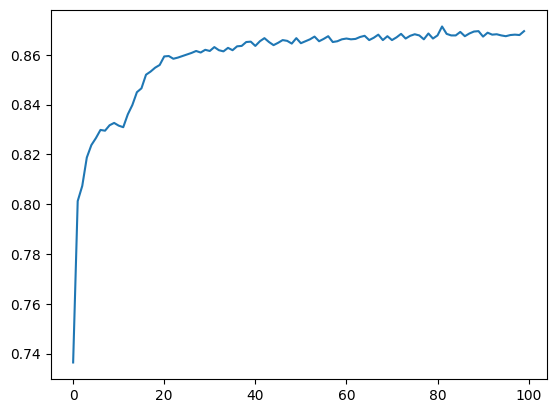

In [33]:
plt.plot(history.history['accuracy'])

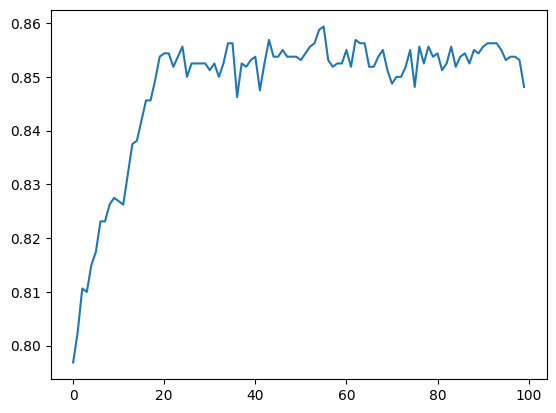

In [34]:
plt.plot(history.history['val_accuracy'])

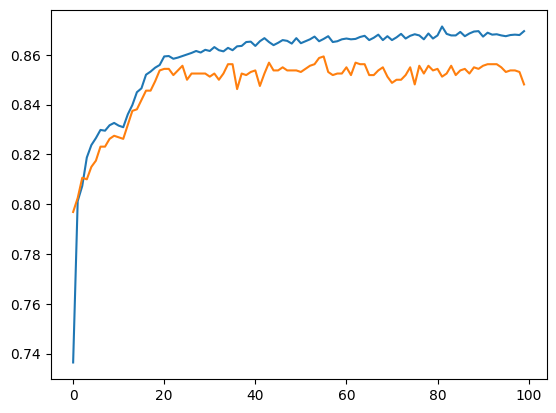

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])